In [4]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from IPython.display import display, Markdown, Latex
from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re
import json

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments


In [5]:
py.offline.init_notebook_mode()
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)

In [13]:
book = 'greatex_100k'

ents = pd.read_csv(r'outputs\{book}.ent.csv'.format(book=book), index_col=0)
df = pd.read_csv(r'outputs\{book}.data.csv'.format(book=book), index_col=0)
meta = r'outputs\{book}.meta.json'.format(book=book)

rel_cols = list(df.columns[list(df.columns.str.startswith('R_'))])
lex_cols = list(df.columns[list(df.columns.str.startswith('L_'))])
with open(meta) as f:
    meta_json = json.load(f)
meta_json

{'cmd': ['book_parse.py',
  '-mfb',
  '-t1',
  '100_000',
  '..\\datasets\\2_txtalb_Novel450\\EN_1861_Dickens,Charles_GreatExpectations_Novel.txt',
  'greatex_100k',
  'outputs'],
 'time': '2019-08-02T17:30:19.882714',
 'input_filename': '..\\datasets\\2_txtalb_Novel450\\EN_1861_Dickens,Charles_GreatExpectations_Novel.txt',
 'time_init': 1.1016655,
 'time_process': 23.041879,
 'time_write': 0.9565388000000006,
 'n_predicates': 2549,
 'n_corefs': 5070,
 'ent_file': 'outputs\\greatex_100k.ent.csv',
 'doc_file': 'outputs\\greatex_100k.doc.pkl',
 'data_file': 'outputs\\greatex_100k.data.csv'}

In [17]:
data = df.drop_duplicates()
data.loc[:,rel_cols] = data[rel_cols].fillna('NONE').replace('NONE','').apply(lambda c: c.str.lower(), axis='columns')
data.loc[:,rel_cols] = data[rel_cols].replace('','NONE')
data

L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0                 0.0                     0.0                0.0   
1                 0.0                     1.0                0.0   
6                 0.0                     0.0                0.0   
7                 0.0                     0.0                0.0   
9                 0.0                     0.0                0.0   
10                0.0                     1.0                0.0   
16                0.0                     1.0                0.0   
19                0.0                     0.0                0.0   
20                0.0                     0.0                0.0   
21                0.0                     0.0                0.0   
23                0.0                     0.0                0.0   
24                0.0                     1.0                0.0   
30                0.0                     0.0                1.0   
33                0.0                     0.0                0.0   
36                0.0                     0.0                0.0   
38                0.0                     0.0                0.0   
40                0.0                     0.0                0.0   
41                0.0                     1.0                0.0   
42                0.0                     0.0                0.0   
45                0.0                     0.0                0.0   
47                0.0                     0.0                0.0   
49                0.0                     0.0                0.0   
50                0.0                     0.0                0.0   
51                0.0                     0.0                1.0   
53                0.0                     0.0                0.0   
54                0.0                     1.0                0.0   
59                0.0                     1.0                0.0   
65                0.0                     1.0                0.0   
66                0.0                     0.0                0.0   
68                0.0                     0.0                0.0   
...               ...                     ...                ...   
2491              0.0                     1.0                0.0   
2496              0.0                     0.0                0.0   
2497              0.0                     0.0                0.0   
2498              0.0                     0.0                0.0   
2500              0.0                     0.0                0.0   
2501              0.0                     0.0                0.0   
2505              0.0                     0.0                0.0   
2507              0.0                     1.0                0.0   
2509              0.0                     0.0                0.0   
2510              0.0                     0.0                0.0   
2511              0.0                     1.0                0.0   
2512              0.0                     1.0                0.0   
2516              1.0                     1.0                1.0   
2523              0.0                     0.0                0.0   
2525              0.0                     0.0                0.0   
2527              0.0                     1.0                0.0   
2528              0.0                     0.0                0.0   
2529              0.0                     1.0                0.0   
2530              0.0                     0.0                0.0   
2531              0.0                     0.0                0.0   
2532              0.0                     1.0                0.0   
2533              0.0                     1.0                0.0   
2537              0.0                     0.0                0.0   
2539              1.0                     0.0                0.0   
2542              0.0                     1.0                0.0   
2543              0.0                     1.0                0.0   
2544              0.0                     0.0                0

In [18]:
data = data.groupby(['t','R_agent','R_patient','lemma']).mean().reset_index()
#data[rel_cols] = data[rel_cols].replace('NONE', np.nan)
data

t            R_agent          R_patient        lemma  \
0         3                 my               NONE       father   
1        16                 my               NONE       infant   
2        51                 my               NONE       father   
3        57                 my               NONE    authority   
4        79                 my               NONE       father   
5        82                 my               NONE       mother   
6       107                 my               NONE        fancy   
7       127                 my               NONE       father   
8       137             father               NONE         dark   
9       148             father               NONE        black   
10      169                 my               NONE     childish   
11      175                 my               NONE       mother   
12      179                 my               NONE       sickly   
13      204              their               NONE        grave   
14      242                 my               NONE    entertain   
15      297                 my               NONE        vivid   
16      300                 my               NONE   impression   
17      321                 my               NONE         find   
18      321                 my               NONE         time   
19      593                man                 me        seize   
20      615                man               NONE       terror   
21      777              piece                 me         heel   
22      814                man               NONE          eat   
23      830                man               NONE         lick   
24      873                man                 em          eat   
25      905                man               NONE         hope   
26      955                man               NONE       mother   
27      968                sir               NONE        start   
28      981                sir               NONE     shoulder   
29      992                man               NONE      explain   
...     ...                ...                ...          ...   
1009  22368                man               NONE         hope   
1010  22389           mrs. joe               NONE   occasional   
1011  22389           mrs. joe  uncle pumblechook         trip   
1012  22398           mrs. joe                him       assist   
1013  22414  uncle pumblechook               NONE       repose   
1014  22420  uncle pumblechook               NONE   confidence   
1015  22424  uncle pumblechook               NONE      servant   
1016  22439           mrs. joe               NONE   expedition   
1017  22443                man               NONE         fire   
1018  22443                man               NONE       hearth   
1019  22500                man               NONE        think   
1020  22508                man               NONE         star   
1021  22530                man               NONE        death   
1022  22569                her               NONE         iron   
1023  22587                her               NONE        usual   
1024  22590                 we               NONE         fire   
1025  22590                 we               NONE        ready   
1026  22632                 we               NONE  preparation   
1027  22651  uncle pumblechook               mare        cover   
1028  22665                 we               NONE         cold   
1029  22697           mrs. joe               NONE        haste   
1030  22705           mrs. joe               NONE   excitement   
1031  22714           mrs. joe               NONE     shoulder   
1032  22786                  i               NONE         fear   
1033  22814                  i               NONE       motion   
1034  22832                man               NONE       motion   
1035  22851             sister                him        catch   
1036  22866                man               NONE         nose   
1037  22869                man               NONE 

In [27]:
display(Markdown('## Number of predicates per subsentence'))
data.groupby(['t']).i.count().value_counts()

## Number of predicates per subsentence

1    901
2     57
3      5
5      1
4      1
Name: i, dtype: int64

In [28]:
ents

categ  entity_i entity_pos  entity_root entity_tag  entity_text  \
0         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
1         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
2         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
3         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
4         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
5         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
6         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
7         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
8         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
9         unknown       NaN        NaN      UNKNOWN        NaN          NaN   
10        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
11        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
12        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
13        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
14        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
15        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
16        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
17        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
18        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
19        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
20        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
21        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
22        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
23    environment       NaN        NaN  ENVIRONMENT        NaN          NaN   
24        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
25        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
26    environment       NaN        NaN  ENVIRONMENT        NaN          NaN   
27        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
28        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
29        unknown       NaN        NaN      UNKNOWN        NaN          NaN   
...           ...       ...        ...          ...        ...          ...   
5040       person     394.0       NOUN          man         NN        a man   
5041       person     395.0        DET          her       PRP$          her   
5042       person     395.0        DET          her       PRP$          her   
5043       person     396.0       PRON           we        PRP           We   
5044       person     396.0       PRON           we        PRP           We   
5045       person     396.0       PRON           we        PRP           We   
5046       person     396.0       PRON           we        PRP           We   
5047      unknown     397.0       PRON         they        PRP         they   
5048      unknown     397.0       PRON         they        PRP         they   
5049  environment     398.0       NOUN      kitchen         NN  the kitchen   
5050  environment     398.0       NOUN      kitchen         NN  the kitchen   
5051  environment     399.0       NOUN      nothing         NN      nothing   
5052  environment     399.0       NOUN      nothing         NN      nothing   
5053  environment     400.0       NOUN       bonnet         NN   her bonnet   
5054  environment     400.0       NOUN       bonnet         NN   her bonnet   
5055       person     401.0       NOUN          boy         NN     this boy   
5056       person     401.0       NOUN          boy         NN     this boy   
5057     narrator     402.0       PRON            i        PRP            I   
5058     narrator     402.0       PRON            i        PRP

In [29]:
ent_counts = pd.concat([data[r] for r in rel_cols], axis='rows').replace('NONE',None).dropna().value_counts()
most_common = ent_counts.idxmax() # most common
print('most_common =', most_common)
ent_counts

most_common = me


me                 246
man                238
him                170
i                  167
you                130
it                 121
my                  68
joe                 68
myself              52
himself             49
he                  40
mrs. joe            36
sister              35
sergeant            32
river               30
aunt                24
them                23
loaf                22
her                 21
convict             21
dog                 20
themselves          20
em                  19
mr. pumblechook     19
we                  18
face                16
sir                 16
church              15
boy                 15
forge               15
                  ... 
fetter               2
dike                 2
arms                 2
cattle               2
disclosure           2
beast                2
tailor               2
elders               1
terror               1
your                 1
their                1
yours                1
leg        

In [30]:
#ents[ents.categ == 'narrator']
data[data.R_agent.str.lower().str.contains('joe')]

t      R_agent          R_patient        lemma  L_NRCw_Em_anger  \
93     2378  joe gargery                her        marry              0.0   
94     2384          joe               NONE         curl              0.0   
95     2384          joe               NONE         fair              0.0   
99     2424          joe               NONE         dear              0.0   
100    2424          joe               NONE     tempered              0.0   
101    2428          joe               NONE         good              0.0   
102    2432          joe               NONE        sweet              0.0   
103    2434          joe               NONE      foolish              0.0   
104    2443          joe               NONE       fellow              0.0   
105    2443          joe               NONE     weakness              0.0   
106    2450          joe               NONE     strength              0.0   
107    2464          joe               NONE        black              0.0   
112    2605          joe               NONE        forge              0.0   
114    2660          joe               NONE       fellow              0.0   
115    2661          joe               NONE     sufferer              0.0   
116    2665          joe               NONE   confidence              0.0   
117    2670          joe               NONE       impart              0.0   
118    2672          joe                 me   confidence              0.0   
126    2823     mrs. joe               NONE         grab              1.0   
127    2840          joe               NONE         fire              0.0   
128    2849          joe               NONE          low              0.0   
132    2930     mrs. joe               NONE       coming              0.0   
146    3315     mrs. joe            tickler      restore              0.0   
147    3410          joe               NONE    calculate              0.0   
148    3436          joe               NONE         time              0.0   
149    3452          joe               NONE         blue              0.0   
171    3789          joe               NONE         good              0.0   
173    3835          joe                 me       invite              0.0   
177    3857          joe                 me         find              0.0   
181    3980          joe               NONE        mouth              0.0   
...     ...          ...                ...          ...              ...   
428    9333     mrs. joe               NONE      uncover              0.0   
429    9334     mrs. joe               NONE        clean              0.0   
430    9335     mrs. joe               NONE        white              0.0   
431    9355     mrs. joe               NONE         cool              0.0   
432    9355     mrs. joe               NONE         rest              0.0   
433    9381     mrs. joe               NONE         haze              0.0   
434    9381     mrs. joe               NONE         nose              0.0   
435    9402     mrs. joe               NONE        black              0.0   
436    9403     mrs. joe               NONE        mouth              0.0   
437    9425     mrs. joe               NONE        clean              0.0   
438    9431     mrs. joe               NONE    exquisite              0.0   
439    9432     mrs. joe               NONE          art              0.0   
440    9436     mrs. joe               NONE  cleanliness              0.0   
472    9952          joe               NONE         find              0.0   
473    9959     mrs. joe               NONE       dinner              0.0   
474    9989     mrs. joe               NONE     splendid              0.0   
596   12910     mrs. joe                 me      graciou              0.0   
597   12926     mrs. joe               NONE     gracious              0.0   
598   12926     mrs. joe               NONE       lament              0.0   
599   12930     mrs. joe               NONE     goodness              0.0   
610   

In [31]:
def make_entity_lookup(ents, subject=None):
    ents_lookup = ents[['t0','entity_root', 'categ']].drop_duplicates()
    #ents_lookup.rename(index=str, columns={'entity_root': 'root', 'entity_name': 'name'}, inplace=True)
    #ents_lookup.set_index('entity_root', inplace=True, verify_integrity=True)
    
    is_narrator = ents_lookup.categ == 'narrator'
    is_reader = ents_lookup.categ == 'reader'

    if subject:
        is_subject = ents_lookup.entity_root == subject
    else:
        is_subject = is_narrator
        
    #ents_lookup.loc[narrator,'entity_root'] = 'NARRATOR'
    #ents_lookup.loc[reader,'entity_root'] = 'READER'

    ents_lookup.loc[is_narrator,'categ'] = 'person'
    ents_lookup.loc[is_reader,'categ'] = 'person'
    
    ents_lookup.loc[is_subject, 'categ'] = 'subject'
    
    ents_lookup.loc[is_subject, 'categ'] = 'subject'
    
    
    most_likely_categ = lambda fr: fr.categ.value_counts(normalize=True, ascending=False, dropna=False).idxmax()
    ents_lookup = ents_lookup.groupby('entity_root').apply(most_likely_categ)
    ents_lookup.name = 'ent_class'
    
    ents_lookup.loc['NONE'] = 'none'
    
    #ents_lookup.at['NARRATOR']
    return ents_lookup

subject = most_common
ents_lookup = make_entity_lookup(ents, subject=subject)
print(ents_lookup[ents_lookup == 'subject'])
ents_lookup[ents_lookup == 'person']

entity_root
me    subject
Name: ent_class, dtype: object


entity_root
'em                    person
NARRATOR               person
PERSON                 person
READER                 person
aunt                   person
back                   person
beast                  person
biddy                  person
blacksmith             person
boy                    person
carols                 person
child                  person
clergyman              person
company                person
convict                person
convicts               person
creature               person
dike                   person
dog                    person
elders                 person
ends                   person
face                   person
father                 person
friend                 person
guard                  person
hands                  person
he                     person
head                   person
her                    person
herself                person
                        ...  
nobody                 person
o                      perso

In [32]:
ents_lookup.loc[ents_lookup.index.str.startswith('N')]

entity_root
NARRATOR    person
NONE          none
Name: ent_class, dtype: object

In [33]:
ents_lookup[ents.entity_root].value_counts(dropna=False)

person         2474
unknown        1686
environment     728
subject         171
NaN              11
Name: ent_class, dtype: int64

In [34]:
ents_lookup[ents_lookup.isna()]

entity_root
christmas day    NaN
constable        NaN
hulk             NaN
ope              NaN
Name: ent_class, dtype: object

In [35]:
def set_entity_class(data, ents_lookup):
    merged = data.copy()
    #merged[rel_cols] = merged[rel_cols].replace('NONE', None)
    for col in rel_cols:
        rel = col[2:]
        #print(f'merge on left:{col} ({rel}), right: {ents_lookup.index.name}')
        merged = merged.merge(ents_lookup, how='left', left_on=col, right_index=True, suffixes=('',f'__{rel}'))

    # fix first merge not applying suffix:
    merged.rename(index=str, columns={ents_lookup.name: f'{ents_lookup.name}__{rel_cols[0][2:]}'}, inplace=True)
    #merged[rel_cols] = merged[rel_cols].replace('NONE', None)
    return merged

merged = set_entity_class(data, ents_lookup)
merged

t            R_agent          R_patient        lemma  \
0         3                 my               NONE       father   
1        16                 my               NONE       infant   
2        51                 my               NONE       father   
3        57                 my               NONE    authority   
4        79                 my               NONE       father   
5        82                 my               NONE       mother   
6       107                 my               NONE        fancy   
7       127                 my               NONE       father   
8       137             father               NONE         dark   
9       148             father               NONE        black   
10      169                 my               NONE     childish   
11      175                 my               NONE       mother   
12      179                 my               NONE       sickly   
13      204              their               NONE        grave   
14      242                 my               NONE    entertain   
15      297                 my               NONE        vivid   
16      300                 my               NONE   impression   
17      321                 my               NONE         find   
18      321                 my               NONE         time   
19      593                man                 me        seize   
20      615                man               NONE       terror   
21      777              piece                 me         heel   
22      814                man               NONE          eat   
23      830                man               NONE         lick   
24      873                man                 em          eat   
25      905                man               NONE         hope   
26      955                man               NONE       mother   
27      968                sir               NONE        start   
28      981                sir               NONE     shoulder   
29      992                man               NONE      explain   
...     ...                ...                ...          ...   
1009  22368                man               NONE         hope   
1010  22389           mrs. joe               NONE   occasional   
1011  22389           mrs. joe  uncle pumblechook         trip   
1012  22398           mrs. joe                him       assist   
1013  22414  uncle pumblechook               NONE       repose   
1014  22420  uncle pumblechook               NONE   confidence   
1015  22424  uncle pumblechook               NONE      servant   
1016  22439           mrs. joe               NONE   expedition   
1017  22443                man               NONE         fire   
1018  22443                man               NONE       hearth   
1019  22500                man               NONE        think   
1020  22508                man               NONE         star   
1021  22530                man               NONE        death   
1022  22569                her               NONE         iron   
1023  22587                her               NONE        usual   
1024  22590                 we               NONE         fire   
1025  22590                 we               NONE        ready   
1026  22632                 we               NONE  preparation   
1027  22651  uncle pumblechook               mare        cover   
1028  22665                 we               NONE         cold   
1029  22697           mrs. joe               NONE        haste   
1030  22705           mrs. joe               NONE   excitement   
1031  22714           mrs. joe               NONE     shoulder   
1032  22786                  i               NONE         fear   
1033  22814                  i               NONE       motion   
1034  22832                man               NONE       motion   
1035  22851             sister                him        catch   
1036  22866                man               NONE         nose   
1037  22869                man               NONE 

In [36]:
subject_mask = (merged.ent_class__agent == 'subject') | (merged.ent_class__patient == 'subject')
subject_rows = merged[subject_mask]
print(len(subject_rows), 'rows with subject')
subject_rows

96 rows with subject


t   R_agent R_patient       lemma  L_NRCw_Em_anger  \
19     593       man        me       seize              0.0   
21     777     piece        me        heel              0.0   
118   2672       joe        me  confidence              0.0   
136   2988       she        me       fence              1.0   
139   3057         i        me        wear              0.0   
173   3835       joe        me      invite              0.0   
177   3857       joe        me        find              0.0   
186   4029       joe        me        fall              0.0   
206   4590        me      NONE        case              0.0   
207   4607        me      NONE     comfort              0.0   
208   4607        me      NONE       great              0.0   
220   4763         i        me       think              0.0   
302   6577        me      NONE     oppress              1.0   
303   6578        me      NONE  conscience              0.0   
304   6581        me     hulks     phantom              0.0   
305   6581        me        me     phantom              0.0   
308   6709        me      NONE  conscience              0.0   
312   6834        me      NONE        iron              0.0   
313   6855        me      NONE     Battery              1.0   
314   6907        me      mist   confusion              1.0   
315   6913        me    myself        find              0.0   
316   6963        me      NONE       cross              1.0   
317   7019        me      NONE       think              0.0   
319   7036        me      NONE  unexpected              0.0   
320   7041        me       him       touch              0.0   
321   7049        me      NONE    shoulder              0.0   
323   7148       man        me       swear              0.0   
328   7196        me       him        lose              1.0   
329   7209        me      NONE       think              0.0   
330   7211        me      NONE        feel              1.0   
..     ...       ...       ...         ...              ...   
511  10883        me      NONE        good              0.0   
514  10968       man        me     comfort              0.0   
549  11839      nose        me   aggravate              1.0   
596  12910  mrs. joe        me     graciou              0.0   
600  12964        me      NONE       sense              0.0   
602  13003        me      NONE    shoulder              0.0   
603  13031        me      NONE       young              0.0   
607  13104        me      NONE        king              0.0   
608  13107        me      NONE       honor              0.0   
617  13661    nobody        me       think              0.0   
676  14813        me      NONE        time              0.0   
677  14821        me      NONE       dread              0.0   
678  14833        me      NONE     convict              1.0   
679  14864        me      NONE      fierce              1.0   
680  14865        me      NONE       young              0.0   
681  14869        me       him        join              0.0   
682  14869        me      hunt        join              0.0   
683  14928        me      NONE      hunter              0.0   
686  14976        me      NONE       begin              0.0   
689  15069        me      NONE     convict              1.0   
690  15099        me      NONE        time              0.0   
691  15117        me      NONE       start              0.0   
692  15119        me      NONE    dreadful              1.0   
693  15124        me      NONE       think              0.0   
754  16554   convict        me      murder              1.0   
795  17558       man        me       stare              0.0   
932  20470       man        me      mother              0.0   
963  21222       man        me       catch              0.0   
964  21255        it        me     signify              0.0   
967  21379       man        me        dear              0.0   

     L_NRCw_Em_anticipation  L_NRCw_Em_disgust  L_NRCw_Em_fear  L_NRCw_Em_joy  \
19                   

In [455]:
def cascade_representation(data, dummies_cols, token_cols, casc_index=['t']):
    dum_cascades = pd.get_dummies(data[dummies_cols], dummy_na=False, prefix_sep='+')
    dum_cascades.rename(mapper=lambda c: '_'.join(c.split('__')[1].split('+')), axis='columns', inplace=True)
    dum_casc_cols = list(dum_cascades.columns)
    
    tok_cascades = (data[token_cols] > data[token_cols].mean()) * 1
    casc = pd.concat([data[casc_index], dum_cascades, tok_cascades], axis='columns')
    casc = casc.groupby(casc_index).any()*1
    return casc


ent_cols = list(merged.columns[list(merged.columns.str.contains('__'))])
#print(~merged.neg.fillna(0))
keep = (~merged[ent_cols].isna()).any(axis='columns') & ~merged.neg.fillna(False)
casc = cascade_representation(
    merged[keep][['t','neg']+ent_cols+rel_cols+lex_cols],
    dummies_cols=ent_cols,
    token_cols=lex_cols)

unk_cols = list(casc.columns[list(casc.columns.str.endswith('_unknown'))])
print(unk_cols)
casc['unknown'] = casc[unk_cols].any(axis='columns').astype(int)
casc.drop(unk_cols, axis='columns', inplace=True)
casc.drop('patient_none', axis='columns', inplace=True)
casc


['agent_unknown', 'patient_unknown']


agent_environment  agent_person  agent_subject  patient_environment  \
t                                                                            
0                      0             1              0                    0   
46                     0             1              0                    0   
74                     0             1              0                    0   
120                    0             1              0                    0   
151                    0             1              0                    0   
181                    0             1              0                    0   
294                    0             1              0                    0   
316                    0             1              0                    0   
538                    0             1              0                    0   
603                    0             1              0                    0   
759                    1             1              0                    0   
820                    0             1              0                    0   
901                    0             1              0                    0   
952                    0             1              0                    0   
960                    0             1              0                    0   
985                    0             1              0                    0   
998                    0             1              0                    0   
1005                   0             1              0                    0   
1016                   0             1              0                    0   
1051                   0             1              0                    0   
1080                   0             1              0                    0   
1177                   0             1              0                    0   
1363                   1             0              0                    0   
1383                   0             1              0                    0   
1411                   0             1              0                    0   
1427                   0             1              0                    0   
1482                   0             1              0                    0   
1531                   0             1              0                    0   
1551                   0             1              0                    0   
1560                   0             1              0                    0   
...                  ...           ...            ...                  ...   
89149                  0             1              0                    0   
89172                  0             1              0                    0   
89224                  0             0              0                    0   
89246                  0             1              0                    0   
89302                  0             1              0                    0   
89332                  0             1              0                    0   
89351                  0             1              0                    0   
89378                  0             1              0                    0   
89439                  0             1              0                    0   
89472                  0             1              0                    0   
89515                  0             1              0                    0   
89575                  0             1              0                    0   
89588                  0             1              0                    0   
89624                  0             1              0                    0   
89652                  0             1              0                    0   
89713                  0             1              0                    0   
89726                  0             1              0                    0   
89765                  0             1              0                    0   
89780                  0     

In [456]:
casc[casc.agent_subject > 0].sum()

agent_environment          1
agent_person              19
agent_subject             96
patient_environment        9
patient_person            14
patient_subject            5
L_NRCw_Em_anger           27
L_NRCw_Em_anticipation    57
L_NRCw_Em_disgust         18
L_NRCw_Em_fear            33
L_NRCw_Em_joy             39
L_NRCw_Em_negative        51
L_NRCw_Em_positive        65
L_NRCw_Em_sadness         35
L_NRCw_Em_surprise        36
L_NRCw_Em_trust           58
unknown                    2
dtype: int64

In [457]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    print('casc cols:', casc.columns)
    ent_casc_cols = list(casc.columns[list(~casc.columns.str.startswith('L_'))])
    for ecol in ent_casc_cols:
        if ecol not in casc.columns:
            print('Ignoring col', ecol)
            continue
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        trace_data = [(c, mask.index[mask[c]]) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            #"text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

casc cols: Index(['agent_environment', 'agent_person', 'agent_subject',
       'patient_environment', 'patient_person', 'patient_subject',
       'L_NRCw_Em_anger', 'L_NRCw_Em_anticipation', 'L_NRCw_Em_disgust',
       'L_NRCw_Em_fear', 'L_NRCw_Em_joy', 'L_NRCw_Em_negative',
       'L_NRCw_Em_positive', 'L_NRCw_Em_sadness', 'L_NRCw_Em_surprise',
       'L_NRCw_Em_trust', 'unknown'],
      dtype='object')


In [458]:
casc.loc[casc['agent_subject'] == 1, lex_cols]

L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
t                                                                   
4584                 0                       1                  0   
6561                 1                       0                  1   
6693                 0                       0                  0   
6800                 0                       0                  0   
6849                 1                       0                  0   
6903                 1                       0                  0   
6951                 1                       0                  0   
7018                 0                       1                  0   
7129                 1                       0                  1   
7208                 1                       1                  1   
7219                 0                       1                  0   
7243                 1                       1                  0   
7292                 0                       1                  0   
9575                 1                       1                  1   
9623                 1                       1                  0   
9700                 0                       1                  0   
9719                 0                       0                  0   
9773                 0                       1                  1   
9809                 0                       1                  0   
9853                 0                       0                  0   
10479                0                       1                  0   
10524                0                       1                  0   
10576                0                       1                  0   
10600                1                       0                  0   
10741                0                       0                  0   
10865                1                       1                  0   
12966                0                       0                  0   
13006                0                       1                  0   
13088                0                       0                  0   
14787                1                       1                  1   
...                ...                     ...                ...   
53010                0                       1                  0   
53064                1                       0                  1   
54069                0                       1                  0   
54468                1                       1                  1   
56244                0                       1                  0   
56305                0                       0                  0   
59339                0                       1                  0   
59497                0                       1                  0   
59540                0                       1                  0   
59595                1                       0                  1   
59625                0                       0                  1   
59778                0                       0                  0   
59909                0                       0                  0   
64177                0                       1                  0   
64757                0                       1                  0   
64792                0                       1                  0   
64800                0                       1                  0   
64823                0                       1                  0   
69536                1                       1                  1   
69639                1                       0                  1   
69676                0                       0                  0   
69702                0                       0                  0   
84202                0                       0                  0   
85043                0                       1                  0   
85090                0                       1                  0   
85230

In [459]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

Ttest_indResult(statistic=array([-0.12816027,  0.05019488, -1.48076316, -0.25092285, -0.44276949,
        2.0491226 ,  1.62871039,  0.2235181 ,  0.05019488,  1.07425622]), pvalue=array([0.89824031, 0.96005195, 0.14133491, 0.80231017, 0.65874307,
       0.04266747, 0.10604131, 0.8235188 , 0.96005195, 0.28489966]))

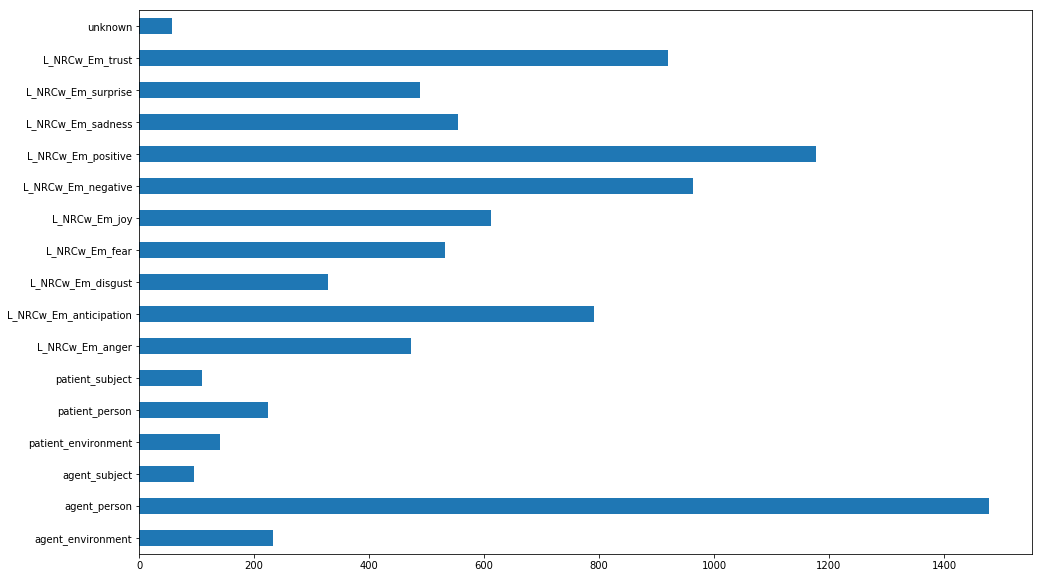

In [460]:
casc.sum().plot(kind='barh')

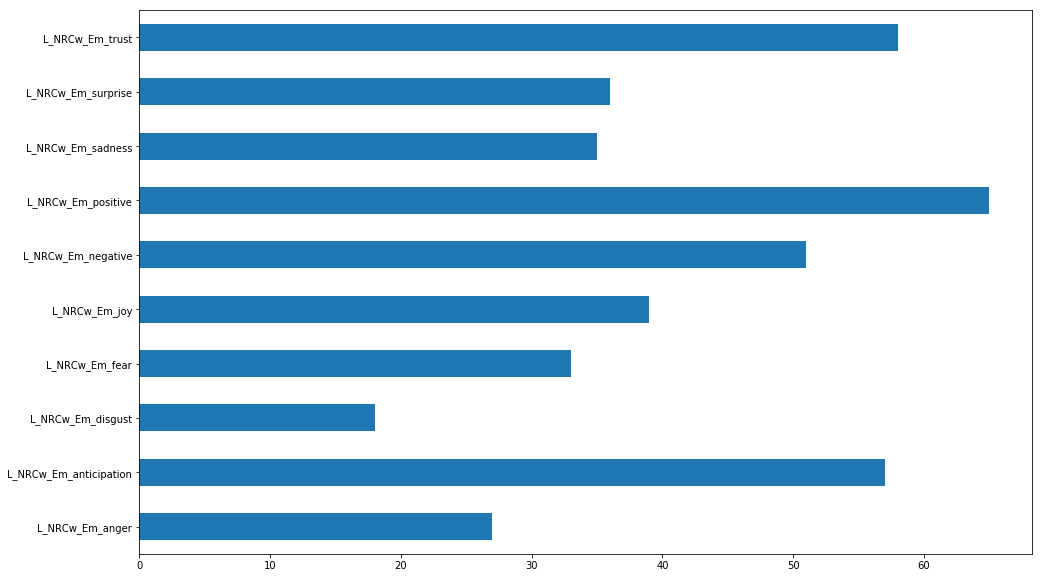

In [461]:
casc.loc[casc['agent_subject'] == 1, lex_cols].sum().plot(kind='barh')

In [462]:
def pair_cascades(casc, sources, destinations, sep=' & '):
    pairs = product(sources, destinations)
    return pd.DataFrame({
        f"{s}{sep}{d}": casc[s] * casc[d]
        for s, d in pairs})

col_startswith = lambda df, pattern: list(df.columns[df.columns.str.startswith(pattern)])
higher_casc = pair_cascades(casc,
                            col_startswith(casc, ('agent','patient')),
                            col_startswith(casc, 'L_'))
higher_casc

agent_environment & L_NRCw_Em_anger  \
t                                            
0                                        0   
46                                       0   
74                                       0   
120                                      0   
151                                      0   
181                                      0   
294                                      0   
316                                      0   
538                                      0   
603                                      0   
759                                      0   
820                                      0   
901                                      0   
952                                      0   
960                                      0   
985                                      0   
998                                      0   
1005                                     0   
1016                                     0   
1051                                     0   
1080                                     0   
1177                                     0   
1363                                     0   
1383                                     0   
1411                                     0   
1427                                     0   
1482                                     0   
1531                                     0   
1551                                     0   
1560                                     0   
...                                    ...   
89149                                    0   
89172                                    0   
89224                                    0   
89246                                    0   
89302                                    0   
89332                                    0   
89351                                    0   
89378                                    0   
89439                                    0   
89472                                    0   
89515                                    0   
89575                                    0   
89588                                    0   
89624                                    0   
89652                                    0   
89713                                    0   
89726                                    0   
89765                                    0   
89780                                    0   
89834                                    0   
89863                                    0   
89896                                    0   
89930                                    0   
89971                                    0   
90026                                    0   
90128                                    0   
90194                                    0   
90209                                    0   
90302                                    1   
90357                                    0   

       agent_environment & L_NRCw_Em_anticipation  \
t                                                   
0                                               0   
46                                              0   
74                                              0   
120                                             0   
151                                             0   
181                                             0   
294                                             0   
316                                             0   
538                                             0   
603                                             0   
759                                             0   
820                                             0   
901                                             0   
952                                             0   
960                                             0   
985                                             0   
998                                             0   
1005                                            0   
1016                                            

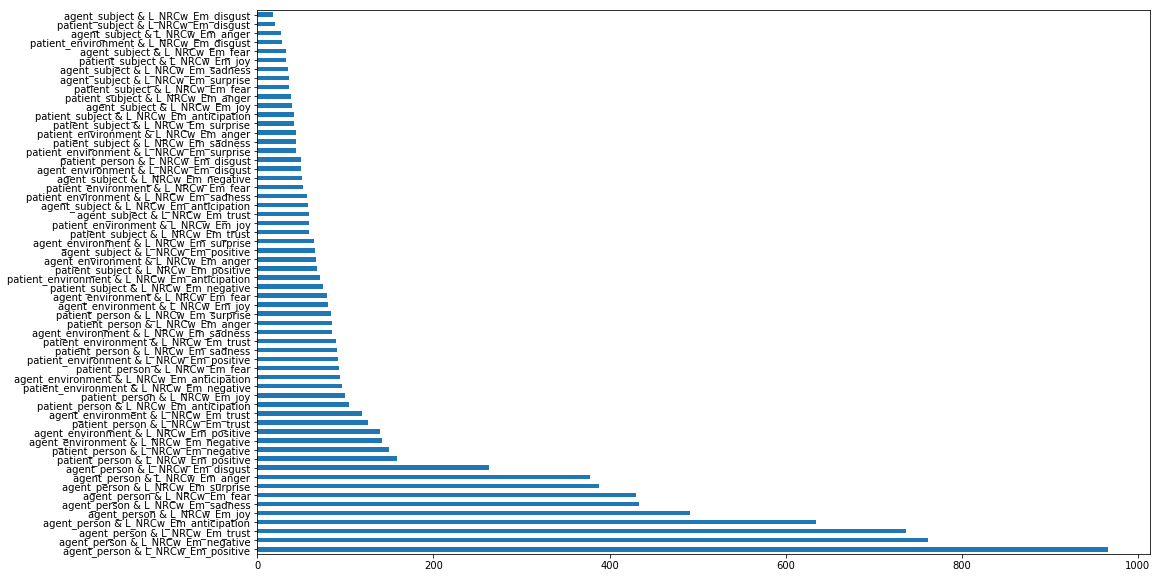

In [463]:
#higher_casc = higher_casc.loc[:, higher_casc.sum() > 15]
higher_casc.sum().sort_values(ascending=False).plot(kind='barh')

In [466]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols, destination_cols, **kwargs):
    #n, m = len(source_cols), len(destination_cols)
    #mat = np.ones([n,m]) * np.nan
    #cols = product(enumerate(source_cols), enumerate(destination_cols))
    rows = []
    for i, sc in enumerate(source_cols):
        rows.append({'source': sc, 
                     **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }})
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df

#src_cols = (list(casc.columns[casc.columns.str.startswith('L_')]) +
#            list(casc.columns[casc.columns.str.startswith('agent_')]))
#dst_cols = list(casc.columns[casc.columns.str.startswith('patient_')])
all_cols = list(higher_casc.columns)
k = 10
T = transfer_entropies(higher_casc, all_cols, all_cols, k=k)
T

agent_environment & L_NRCw_Em_anger  \
source                                                                              
agent_environment & L_NRCw_Em_anger                                 -4.440892e-16   
agent_environment & L_NRCw_Em_anticipation                           5.015419e-03   
agent_environment & L_NRCw_Em_disgust                                1.289765e-03   
agent_environment & L_NRCw_Em_fear                                   7.526296e-04   
agent_environment & L_NRCw_Em_joy                                    4.426047e-03   
agent_environment & L_NRCw_Em_negative                               1.808047e-03   
agent_environment & L_NRCw_Em_positive                               8.765702e-03   
agent_environment & L_NRCw_Em_sadness                                2.836864e-03   
agent_environment & L_NRCw_Em_surprise                               5.885723e-03   
agent_environment & L_NRCw_Em_trust                                  9.671536e-03   
agent_person & L_NRCw_Em_anger                                       5.094236e-03   
agent_person & L_NRCw_Em_anticipation                                1.043218e-02   
agent_person & L_NRCw_Em_disgust                                     5.413677e-03   
agent_person & L_NRCw_Em_fear                                        4.435366e-03   
agent_person & L_NRCw_Em_joy                                         7.223517e-03   
agent_person & L_NRCw_Em_negative                                    4.628873e-03   
agent_person & L_NRCw_Em_positive                                    8.588209e-03   
agent_person & L_NRCw_Em_sadness                                     3.757219e-03   
agent_person & L_NRCw_Em_surprise                                    5.175106e-03   
agent_person & L_NRCw_Em_trust                                       8.172909e-03   
agent_subject & L_NRCw_Em_anger                                      2.123180e-03   
agent_subject & L_NRCw_Em_anticipation                               1.318063e-03   
agent_subject & L_NRCw_Em_disgust                                    3.869567e-04   
agent_subject & L_NRCw_Em_fear                                       2.053045e-03   
agent_subject & L_NRCw_Em_joy                                        8.491921e-04   
agent_subject & L_NRCw_Em_negative                                   2.076412e-03   
agent_subject & L_NRCw_Em_positive                                   1.387378e-03   
agent_subject & L_NRCw_Em_sadness                                    2.078003e-03   
agent_subject & L_NRCw_Em_surprise                                   7.796792e-04   
agent_subject & L_NRCw_Em_trust                                      1.246076e-03   
patient_environment & L_NRCw_Em_anger                                4.501610e-03   
patient_environment & L_NRCw_Em_anticipation                         5.192859e-03   
patient_environment & L_NRCw_Em_disgust                              2.977807e-03   
patient_environment & L_NRCw_Em_fear                                 5.653691e-03   
patient_environment & L_NRCw_Em_joy                                  4.463168e-03   
patient_environment & L_NRCw_Em_negative                             5.601397e-03   
patient_environment & L_NRCw_Em_positive                             3.841508e-03   
patient_environment & L_NRCw_Em_sadness                              4.275578e-03   
patient_environment & L_NRCw_Em_surprise                             6.967306e-03   
patient_environment & L_NRCw_Em_trust                                4.787186e-03   
patient_person & L_NRCw_Em_anger                                     1.611475e-03   
patient_person & L_NRCw_Em_anticipation                              3.402042e-03   
patient_person & L_NRCw_Em_disgust                                   9.886243e-04   
patient_person & L_NRCw_Em_fear                                      1.721226e-03   
patient_person & L_NRCw_Em_joy                                       2.821236e-03   
patient_person & L_NRCw_Em_negative                

In [193]:
seq_cmap = sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

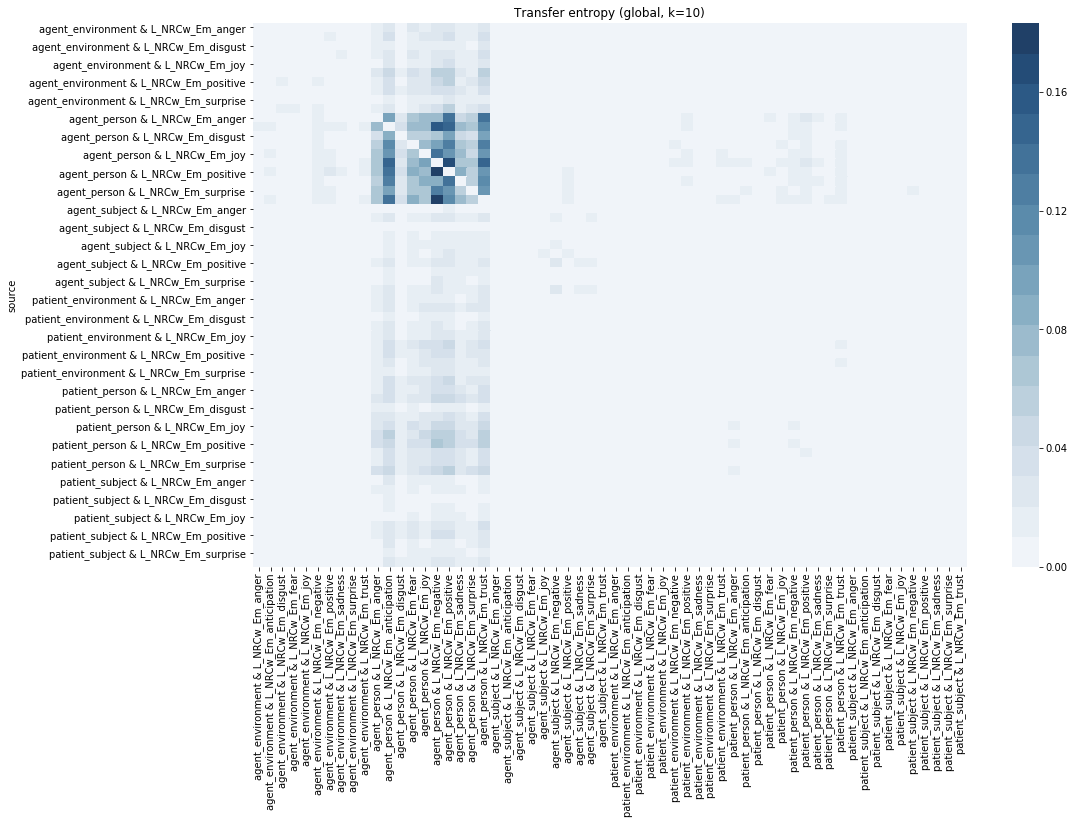

In [479]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

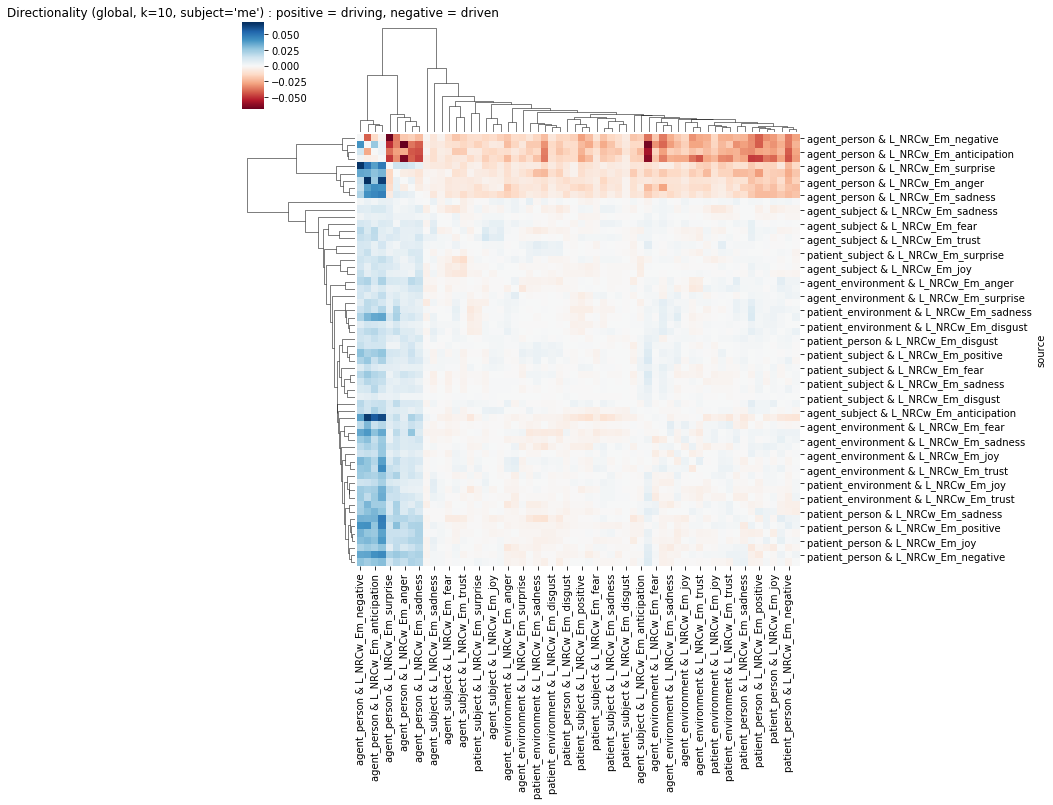

In [467]:
#sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
sns.clustermap((T - T.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

plt.title(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

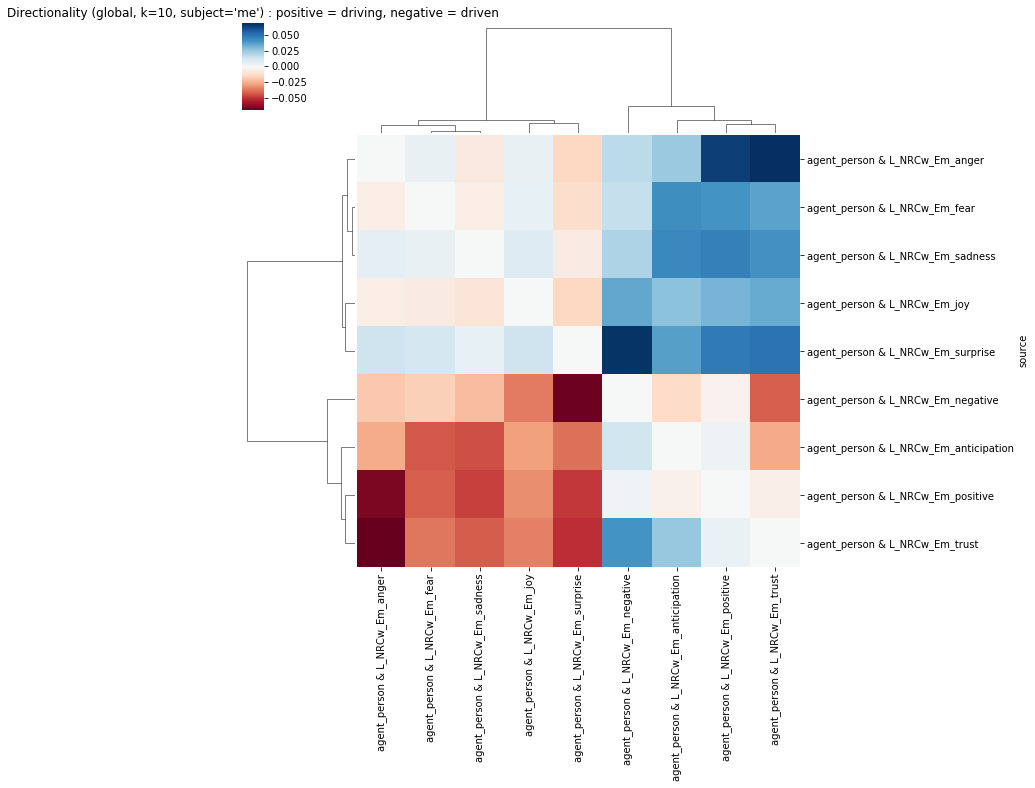

In [468]:
T_sumsq = T.apply(lambda x: x.pow(2).sum())
T_mask = T_sumsq > T_sumsq.mean()
T_core = T.loc[T_mask, T_mask]
sns.clustermap((T_core - T_core.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

plt.title(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

In [469]:
def group_T(T, func, agg='sum'):
    T_core = T.copy().reset_index()
    T_core['ent_role'] = func(T_core.source)
    T_core = T_core.groupby('ent_role').agg(agg)
    T_core = T_core.T.reset_index()
    T_core['ent_role'] = func(T_core['index'])
    T_core = T_core.groupby('ent_role').agg(agg)
    return T_core

TypeError: heatmap() got multiple values for keyword argument 'ax'

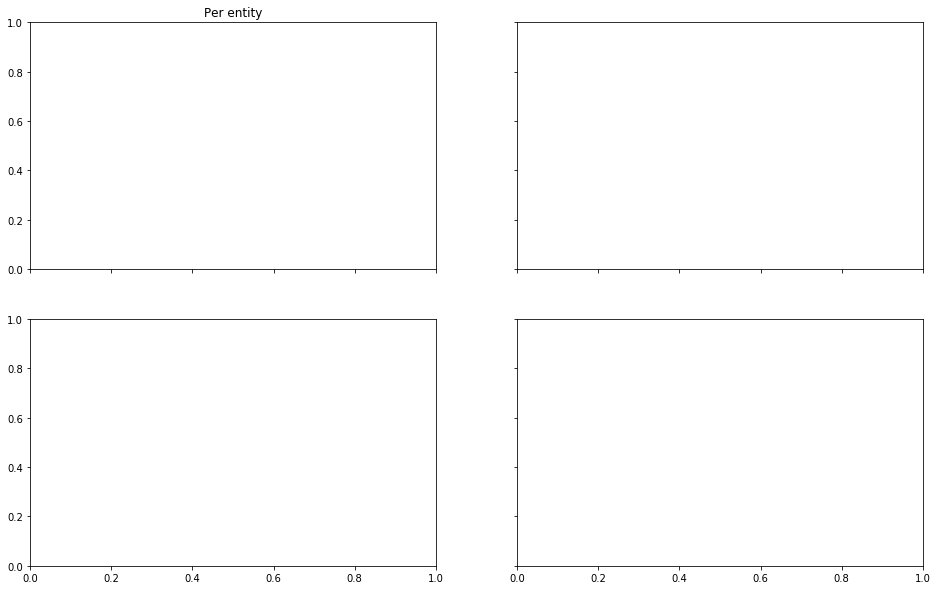

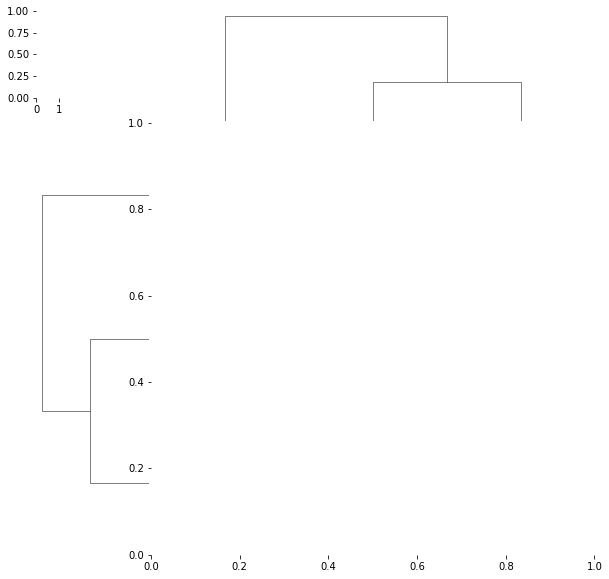

In [470]:
get_ent_role = lambda col: col.str.split(' & ', expand=True)[0]
get_ent = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[1]
get_role = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[0]
get_feat = lambda col: col.str.split(' & ', expand=True)[1]

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

ax = axes[0][0]
ax.set_title('Per entity')
T_core = group_T(T, get_ent)
sns.clustermap((T_core), annot=False, cmap='RdBu', metric='cosine', ax=ax)
fig.suptitle(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

TypeError: heatmap() got multiple values for keyword argument 'ax'

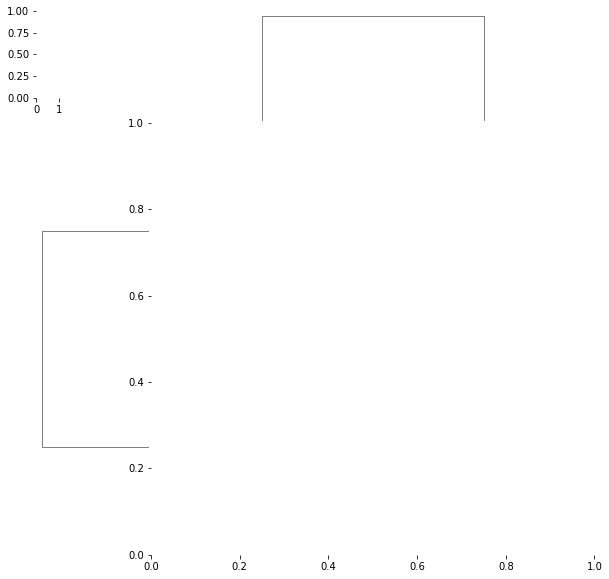

In [471]:
ax = axes[0][1]
ax.set_title('Per role')
T_core = group_T(T, get_role)
sns.clustermap((T_core), annot=False, cmap='RdBu', metric='cosine', ax=ax)

ax = axes[1][0]
ax.set_title('Per entity and role')
T_core = group_T(T, get_ent_role)
sns.clustermap((T_core), annot=False, cmap='RdBu', metric='cosine', ax=ax)

ax = axes[1][1]
ax.set_title('Per feature')
T_core = group_T(T, get_feat)
sns.clustermap((T_core), annot=False, cmap='RdBu', metric='cosine', ax=ax)


fig.suptitle(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

In [480]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

In [481]:
#sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
#plt.show()

In [482]:
block_entrs['block_entropy_k_diff'] = block_entrs.block_entropy_k.diff()
block_entrs[['ent_role','feat']] = block_entrs.cascade.str.split(' & ',expand=True)
block_entrs[['role','entity']] = block_entrs.ent_role.str.split('_',expand=True)
block_entrs['block_entropy_k_ratio'] = block_entrs.block_entropy_k / block_entrs.k
block_entrs['block_entropy_k_ratio_diff'] = block_entrs['block_entropy_k_ratio'].diff()
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

ValueError: Could not interpret input 'ent'

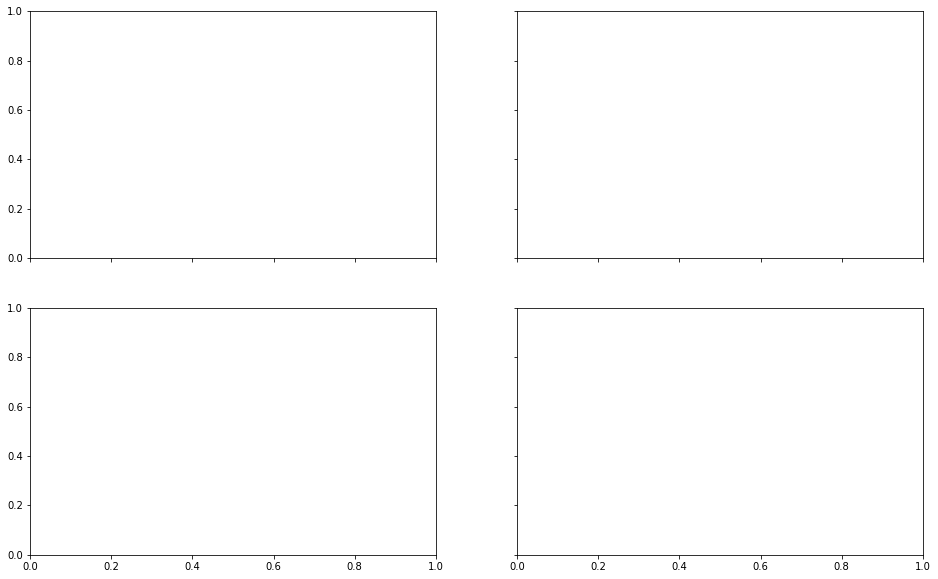

In [483]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy vs history length')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy relative to history length')
plt.show()

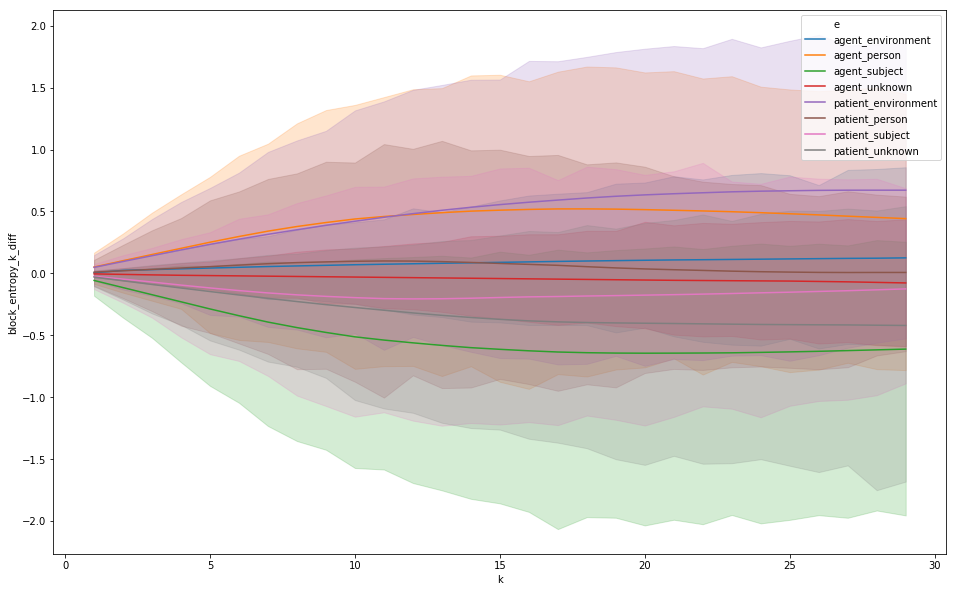

In [207]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_diff', hue='e')
plt.show()

In [86]:
from pyinform import activeinfo as ai

def get_local_ais(casc, cols, k=10):
    n = len(casc.index)
    m = len(cols)
    t = np.tile(np.arange(n), m)
    
    lbl = np.repeat(np.array(cols), n)
    a = []
    pad_w = k-1
    a_c = np.ones([n]) * np.nan
    for c in cols:
        a_c[:-k] = ai.active_info(casc[c], k=k, local=True).squeeze()
        a.append(a_c)
    a = np.concatenate(a)
    
    df = pd.DataFrame({'ais': a, 'cascade': lbl, 't':t})
    df[['e','f']] = df.cascade.str.split(' & ',expand=True)
    return df

ais = get_local_ais(higher_casc, all_cols, k=11)
ais

ais                                     cascade    t  \
0     0.016441  agent_environment & L_NRCw_Em_anticipation    0   
1     0.016441  agent_environment & L_NRCw_Em_anticipation    1   
2     0.016441  agent_environment & L_NRCw_Em_anticipation    2   
3     0.016441  agent_environment & L_NRCw_Em_anticipation    3   
4     0.016441  agent_environment & L_NRCw_Em_anticipation    4   
5     0.016441  agent_environment & L_NRCw_Em_anticipation    5   
6     0.016441  agent_environment & L_NRCw_Em_anticipation    6   
7     0.016441  agent_environment & L_NRCw_Em_anticipation    7   
8     0.016441  agent_environment & L_NRCw_Em_anticipation    8   
9     0.016441  agent_environment & L_NRCw_Em_anticipation    9   
10    0.016441  agent_environment & L_NRCw_Em_anticipation   10   
11    0.016441  agent_environment & L_NRCw_Em_anticipation   11   
12   -0.380399  agent_environment & L_NRCw_Em_anticipation   12   
13    0.069634  agent_environment & L_NRCw_Em_anticipation   13   
14    0.069634  agent_environment & L_NRCw_Em_anticipation   14   
15    0.069634  agent_environment & L_NRCw_Em_anticipation   15   
16   -0.037281  agent_environment & L_NRCw_Em_anticipation   16   
17   -0.045843  agent_environment & L_NRCw_Em_anticipation   17   
18   -0.045843  agent_environment & L_NRCw_Em_anticipation   18   
19    0.069634  agent_environment & L_NRCw_Em_anticipation   19   
20    0.069634  agent_environment & L_NRCw_Em_anticipation   20   
21   -0.308877  agent_environment & L_NRCw_Em_anticipation   21   
22   -0.252294  agent_environment & L_NRCw_Em_anticipation   22   
23    0.069634  agent_environment & L_NRCw_Em_anticipation   23   
24    0.016441  agent_environment & L_NRCw_Em_anticipation   24   
25    0.016441  agent_environment & L_NRCw_Em_anticipation   25   
26   -0.380399  agent_environment & L_NRCw_Em_anticipation   26   
27    0.069634  agent_environment & L_NRCw_Em_anticipation   27   
28    0.069634  agent_environment & L_NRCw_Em_anticipation   28   
29    0.069634  agent_environment & L_NRCw_Em_anticipation   29   
...        ...                                         ...  ...   
7044 -0.308877            patient_person & L_NRCw_Em_trust  363   
7045 -0.252294            patient_person & L_NRCw_Em_trust  364   
7046  0.069634            patient_person & L_NRCw_Em_trust  365   
7047  0.016441            patient_person & L_NRCw_Em_trust  366   
7048  0.016441            patient_person & L_NRCw_Em_trust  367   
7049  0.016441            patient_person & L_NRCw_Em_trust  368   
7050  0.016441            patient_person & L_NRCw_Em_trust  369   
7051  0.016441            patient_person & L_NRCw_Em_trust  370   
7052  0.016441            patient_person & L_NRCw_Em_trust  371   
7053  0.016441            patient_person & L_NRCw_Em_trust  372   
7054  0.016441            patient_person & L_NRCw_Em_trust  373   
7055  0.016441            patient_person & L_NRCw_Em_trust  374   
7056  0.016441            patient_person & L_NRCw_Em_trust  375   
7057  0.016441            patient_person & L_NRCw_Em_trust  376   
7058  0.016441            patient_person & L_NRCw_Em_trust  377   
7059  0.016441            patient_person & L_NRCw_Em_trust  378   
7060  0.016441            patient_person & L_NRCw_Em_trust  379   
7061  0.016441            patient_person & L_NRCw_Em_trust  380   
7062  0.016441            patient_person & L_NRCw_Em_trust  381   
7063       NaN            patient_person & L_NRCw_Em_trust  382   
7064       NaN            patient_person & L_NRCw_Em_trust  383   
7065       NaN            patient_person & L_NRCw_Em_trust  384   
7066       NaN            patient_person & L_NRCw_Em_trust  385   
7067       NaN            patient_person & L_NRCw_Em_trust  386   
7068       NaN            patient_person & L_NRCw_Em_trust  387   
7069       NaN            patient_person & L_NRCw_Em_trust  388   
7070       NaN            patient_person & L_NRCw_Em_trust  389   
7071       NaN            patient_person & L_NRCw_Em_trust

In [87]:
fig = lambda:go.Figure(
    data=[go.Scattergl(
        x=ais.t,
        y=ais.ais,
        marker=dict(color=ais.f),
        #line=dict(color='rgb(0,100,80)'),
        #line=dict(color=color),
        mode='markers',
        name=dict(color=ais.f),
    )],
)
#py.offline.iplot(fig)
#fig, ax = plt.subplots()
sns.scatterplot(data=ais.groupby('t').mean().reset_index(), x='t', y='ais', hue='e', ax=ax)
#py.offline.plot_mpl(fig)
#ais.groupby('e',.rolling(20, by='t').agg(['mean','min','max'])

NameError: name 'ax' is not defined

In [ ]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
#sns.lineplot(data=ais[ais.t < 200], x='t', y='ais', hue='e')
#plt.show()
ais_ts = ais.groupby('f').rolling(5).agg(['mean', 'min', 'max'])

def filled_plot(data, x, y, group, rolling_size=20, **kwargs):
    
    
    X = data.groupby(group)
    X = X.rolling(rolling_size, on=x)
    X = X.agg({y:['mean', 'min', 'max']})
    X.columns = X.columns.to_flat_index()
    #X.reset_index(level=['e','f'])
    
    
    
    data = [
        p
        for (gname, gframe), color in zip(X.groupby(group), DEFAULT_PLOTLY_COLORS)
        for p in filled_line(gframe, name=gname, color=color)
    ]       
    
    
    #X = X.unstack(['e','f'])
    #X.loc[('agent_environment','L_NRCw_Em_negative'),[('ais','mean')]]
    
    grouped = data.groupby(group)
    rolled = grouped.rolling(rolling_size)
    agg = rolled.agg({'t': 'mean', 'ais':['mean', 'min', 'max']})
    agg.columns = agg.columns.to_flat_index()
    
    trend = agg['ais', 'mean']
    x = agg['t', 'mean']
    x_rev = x.iloc[::-1]
    y = ['ais', 'mean']
    y_lb = ['ais', 'min']
    y_ub = ['ais', 'max']
    
    def filled_line(frame, color, name=None, **kwargs):
        
        filled = lambda:go.Scattergl(
            x=x + x.iloc[::-1],
            y=pd.concat([y['min'], y['max']]),
            fill='tozerox',
            fillcolor=color,
            #line=dict(color='rgba(255,255,255,0)'),
            #showlegend=False,
            opacity=0.2,
            name=name,
            **kwargs,
        )
        return [
            #filled,
            go.Scattergl(
                x=x,
                y=y['mean'],
                #line=dict(color='rgb(0,100,80)'),
                line=dict(color=color),
                mode='lines',
                name=name,
                **kwargs,
            ),
        ] 
    
    return go.Figure(
        #data=data,
        #layout=layout,
        data=[
            p
            for (gname, gframe, win_), color in zip(grouped, DEFAULT_PLOTLY_COLORS)
            for p in filled_line(gframe, x=x, y=y, name=gname, color=color)
        ]
    )
    
#fig = filled_plot(ais_ts, x='t', y='ais', group='cascade')

#fig = filled_plot(data=ais[ais.t < 200], x='t', y='ais', group='cascade')
#py.offline.iplot(fig)
#for gn, gf in 
#sns.lineplot(data=ais.rolling(20).mean(), x='t', y='ais', hue='e')
#plt.show()
#sns..plot(x='t', y='ais',kind='line')

rolling_size = 20
grouped = ais.groupby(['e','f'])
rolled = grouped.rolling(rolling_size)
trend = rolled['ais'].mean()
x = rolled['t'].mean()
x_rev = x.iloc[::-1]

In [810]:
X = ais.groupby(['e','f'])
#X = X.reset_index()
X = X.rolling(20, on='t')
trend = X.ais.mean()
X = X.agg({'ais':['mean', 'min', 'max']})
X.columns = X.columns.to_flat_index()
X.apply(lambda s: s - trend, axis='columns')
#X = X.unstack(['e','f'])
#X.loc[:,[('ais','mean')]]
#X.reset_index(level)
##['t','mean']
#X['agent_environment', 'L_NRCw_Em_negative']['t','mean']
#g = grouped.rolling(20)
#g.index[:2]#e, f, win = g.index
#g['t','mean']['patient_person', 'L_NRCw_Em_trust']#[['t','mean']]#,'ais']
#for k,x in g.iterrows():
#    print(k,x)
    #print(gf.describe())
#for x in g[[('t', 'mean'), 'ais']]:
    #print(x)
    #continue
    #print(gn)
    #print(gf[[('t', 'mean'), 'ais']].describe())

ValueError: ('cannot join with no overlapping index names', 'occurred at index (agent_environment, L_NRCw_Em_negative, 0)')

In [734]:
#sns.g
g = grouped.rolling(20)
sns.lineplot(data=g.agg({'t': 'mean', 'ais':['mean', 'min', 'max']}), 
             x=('t', 'mean'), y=('ais', 'mean'), hue=g.index)
plt.show()

ValueError: Could not interpret input 'cascade'

In [737]:
sns.lineplot(data=ais, x='t', y='ais')

AttributeError: 'RollingGroupby' object has no attribute 'index'

In [590]:
py.offline.plot_mpl?

In [591]:
spacy.util.minibatch?

In [5]:
list.pop?

In [ ]:
[].append

In [ ]:
[].push

In [ ]:
[].pop

In [8]:
import spacy
spacy.__version__

'2.1.3'

In [22]:
a = []
a.extend((range(3)))
a.extend((range(4,7)))
print(a)
a.pop(0), a.pop(0), a

[0, 1, 2, 4, 5, 6]


(0, 1, [2, 4, 5, 6])

In [24]:
doc

NameError: name 'doc' is not defined